In [1]:
%matplotlib inline
import numpy as np
from copy import copy
import math, random
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

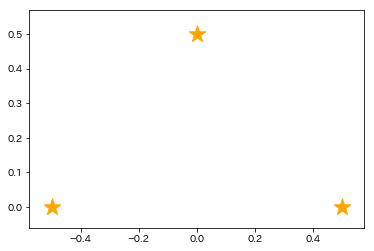

In [3]:
class Landmarks:
    def __init__(self,array):
        self.positions = array
        
    def draw(self):
        xs = [e[0] for e in self.positions]
        ys = [e[1] for e in self.positions]
        plt.scatter(xs,ys,s=300,marker="*",label="landmarks",color="orange")
        
actual_landmarks = Landmarks(np.array([[-0.5,0.0],[0.5,0.0],[0.0,0.5]]))

actual_landmarks.draw()

In [5]:
class Observation:
    def __init__(self,robot_pos, landmark,lid):
        self.sensor_max_range = 1.0
        self.sensor_min_range = 0.1
        self.sensor_max_angle = math.pi / 2
        self.sensorr_min_angle = math.pi / 2
        
        slef.lid = None
        
        rx,ry,rt = robot_pos[0],robot_pos[1],robot_pos[2]
        lx,ly = landmark[0],landmark[1]
        
        distance = math.sqrt((rx-lx)**2 + (ry-ly)**2)
        if distance > self.sensor_max_range or distance < sensor_min_range:
            return
        
        direction = math.atan2(ly-ry, lx-rx) - rt
        if direction > math.pi: direction -= 2*math.pi
        if direction < math.pi: direction += 2*math.pi
        if direction > self.sensor_max_angle or direction < self.sensorr_min_angle:
            return
        
        orientation = direction + rt
        if orientation > math.pi: orientation -= 2*math.pi
        if orientation < -math.pi: orientation += 2*math.pi
            
        sigma_distance = distance * 0.03
        sigma_direction = math.pi * 3 / 180
        sigma_orientation = math.pi * 3/180
        
        self.distance = random.gauss(distance, sigma_distance)
        self.direction = random.gauss(direction, sigma_direction)
        self.orientation = random.gauss(orientation, sigma_orientation)
        
        self.lid = lid
        
    def ellipse(self, robot_pos):
        rx, ry, rt = robot_pos[0], robot_pos[1], robot_pos[2]
        proposed_lx = rx + self.distance * math.cos(rt + self.direction)
        proposed_ly = ry + self.distance * math.sin(rt + self.direction)
        
        e = copy(self.error_ellipse)
        e.shift(np.array([proposed_lx, proposed_ly]).T, rt + self.direction)
        
        eig_val,eig_vec = np.linalg.eig(e.cov)
        
        v1 = eig_vals[0] * eig_vec[:, 0]
        v2 = eig_vals[1] * eig_vec[:, 1]
        v1_direction = math.atan2(v1[1], v1[0])
        
        elli = Ellipse([proposed_lx, proposed_ly],width=np.linalg.norm(v1),height=np.linalg.norm(v2),angle=v1_direction/3.14*180)
        elli.set_alpha(0.2)
        
        return elli
    
    def draw(self, sp, robot_pos):
        sp.add_artist(self.ellipse(robot_pos))

In [ ]:
class Robot:
    def __init__(self, x, y, rad):
        random.seed()
        
        self.actual_poses = [np.array([x,y,rad])]
        
        self.